# Electric Insights Scraper

<br>

### Imports

In [1]:
## Importing standard modules
import pandas as pd
import numpy as np

from datetime import date, timedelta

import electric_insights_scraper as EI

import matplotlib.pyplot as plt
import matplotlib.transforms as mtf

<br>

### Calling a Single Stream

In [3]:
%%time
df = pd.DataFrame()
EI_caller = EI.Caller()

collect_previous_years = False
if collect_previous_years:
    for year in range(2009, 2019):
        start_date = date(year, 1, 1)
        end_date = date(year, 12, 31)
        df = df.append(EI_caller.call_stream(start_date, end_date, 'generation-mix'))
    
start_date = date(2019, 1, 1)
end_date = date(2019, 10, 1)
df = df.append(EI_caller.call_stream(start_date, end_date, 'generation-mix'))

Wall time: 1min 31s


In [4]:
df.head(2)

,nuclear,biomass,coal,gas,hydro,wind,solar,demand,pumped_storage,windOnshore,windOffshore,belgian,dutch,french,ireland,northern_ireland,irish,SP
local_datetime,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00+00:00,6.924,1.116,0,5.853,0.405,11.304,0,27.336,0.000,8.05458,3.14171,0.0,0.182,1.552,0.0,0.0,-0.702,1
2019-01-01 00:30:00+00:00,6.838,1.103,0,6.292,0.388,11.327,0,27.722,0.024,7.86049,3.25389,0.0,0.196,1.554,0.0,0.0,-0.696,2


In [4]:
df.tail(2)

,nuclear,biomass,coal,gas,hydro,wind,solar,demand,pumped_storage,windOnshore,windOffshore,belgian,dutch,french,ireland,northern_ireland,irish,SP
local_datetime,,,,,,,,,,,,,,,,,,
2019-09-24 23:00:00+01:00,6.593,1.815,0,9.882,0.294,5.448,2.01e-05,26.35,0.006,2.61325,2.70153,0.0,0.806,1.506,0.0,0.0,-0.408,47
2019-09-24 23:30:00+01:00,6.596,1.829,0,8.72,0.293,5.133,0,24.979,0.000,1.97142,0.097345,0.0,0.804,1.604,0.0,0.0,-0.344,48


C:\Users\ABour\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


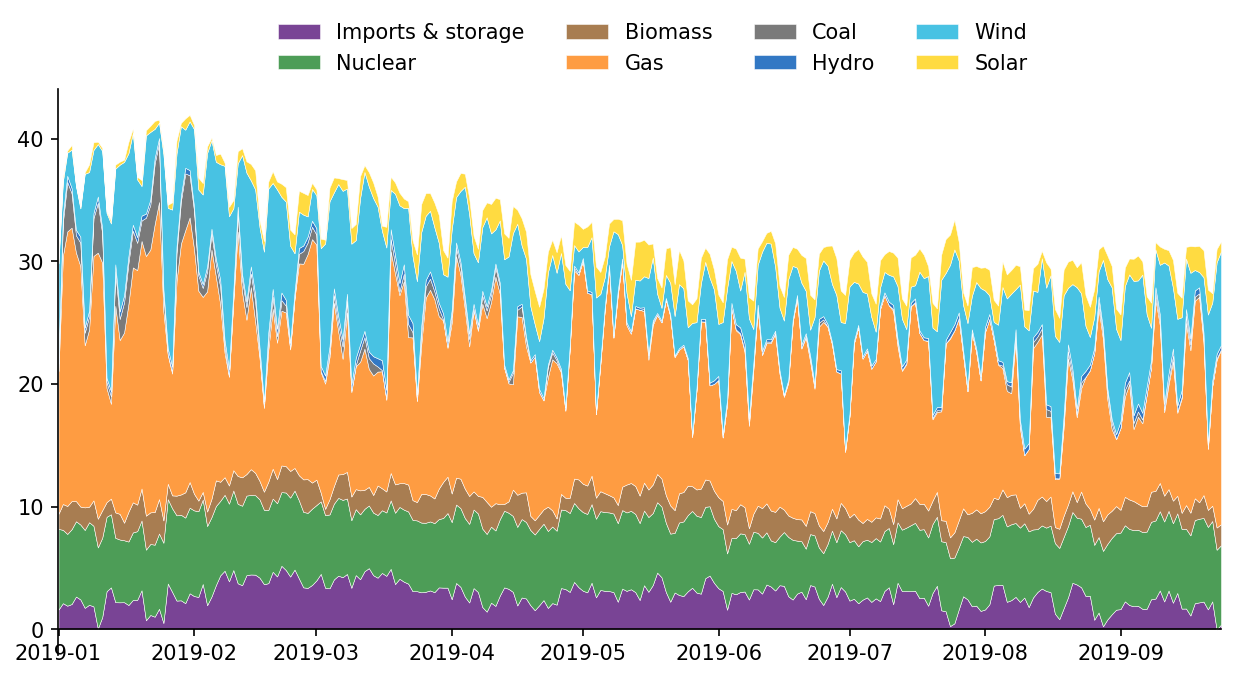

In [5]:
df_resampled = EI.clean_df(df, freq='D')
EI.quick_plot(df_resampled)

In [ ]:
100*df.isnull().sum()/df.shape[0]

<br>

### Making a Single Call on Multiple Streams

In [7]:
start_date = date(2009, 1, 1)
end_date = date(2009, 3, 31)

EI_caller = EI.Caller()
df = EI_caller.call_streams(start_date, end_date)

df.head(2)

,day_ahead_price,SP,imbalance_price,temperature,gCO2_per_kWh,TCO2_per_h,biomass,coal,demand,gas,...,nuclear,pumped_storage,solar,wind,dutch,french,irish,belgian,ireland,northern_ireland
local_datetime,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00+00:00,58.05,1,74.74,-0.6,555,21278,0,17.65,38.329,11.9,...,6.973,-0.404,0,0.148,0.0,1.977,-0.161,0.0,0.0,0.0
2009-01-01 00:30:00+00:00,56.33,2,74.89,-0.6,558,21442,0,17.77,38.461,12.031,...,6.968,-0.527,0,0.157,0.0,1.977,-0.160,0.0,0.0,0.0


In [8]:
df.tail(2)

,day_ahead_price,SP,imbalance_price,temperature,gCO2_per_kWh,TCO2_per_h,biomass,coal,demand,gas,...,nuclear,pumped_storage,solar,wind,dutch,french,irish,belgian,ireland,northern_ireland
local_datetime,,,,,,,,,,,,,,,,,,,,,
2009-03-30 23:00:00+01:00,35.27,47,55.73,7.3,451,15302,0,12.828,38.899,15.751,...,8.429,0.000,0,0.719,0.0,0.795,-0.306,0.0,0.0,0.0
2009-03-30 23:30:00+01:00,30.10,48,56.04,7.3,444,14174,0,10.902,36.301,16.01,...,8.432,-0.601,0,0.674,0.0,0.626,-0.300,0.0,0.0,0.0


<br>

### Making Multiple Calls on Multiple Streams

In [5]:
%%time

df_EI = pd.DataFrame()
EI_caller = EI.Caller()

collect_previous_years = True

if collect_previous_years:
    for year in range(2009, 2019):
        start_date = date(year, 1, 1)
        end_date = date(year+1, 1, 1)
        df_EI = df_EI.append(EI_caller.call_streams(start_date, end_date))
    
start_date = date(2019, 1, 1)
end_date = date(2019, 10, 1)

df_EI_2019 = EI_caller.call_streams(start_date, end_date)

if collect_previous_years:
    df_EI = df_EI.append(df_EI_2019)

Wall time: 9min 5s


In [6]:
df_EI.head(2)

,day_ahead_price,SP,imbalance_price,valueSum,temperature,TCO2_per_h,gCO2_per_kWh,nuclear,biomass,coal,...,demand,pumped_storage,windOnshore,windOffshore,belgian,dutch,french,ireland,northern_ireland,irish
local_datetime,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00+00:00,58.05,1,74.74,74.74,-0.6,21278.0,555.0,6.973,0,17.65,...,38.329,-0.404,None,None,0.0,0,1.977,0.0,0.0,-0.161
2009-01-01 00:30:00+00:00,56.33,2,74.89,74.89,-0.6,21442.0,558.0,6.968,0,17.77,...,38.461,-0.527,None,None,0.0,0,1.977,0.0,0.0,-0.16


In [7]:
df_EI.tail(2)

,day_ahead_price,SP,imbalance_price,valueSum,temperature,TCO2_per_h,gCO2_per_kWh,nuclear,biomass,coal,...,demand,pumped_storage,windOnshore,windOffshore,belgian,dutch,french,ireland,northern_ireland,irish
local_datetime,,,,,,,,,,,,,,,,,,,,,
2019-09-30 23:00:00+01:00,33.40,47,54.9,54.9,14.7,3043.714,116.635270,6.418,1.739,0,...,26.096,0,5.70232,3.52777,0.0,0.11,1.21,0.058,0.08,0.138
2019-09-30 23:30:00+01:00,45.68,48,54.9,54.9,14.7,2332.666,94.539434,6.408,1.746,0,...,24.674,0,5.67986,3.42215,0.0,0.114,1.594,0.204,0.16,0.364


C:\Users\ABour\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


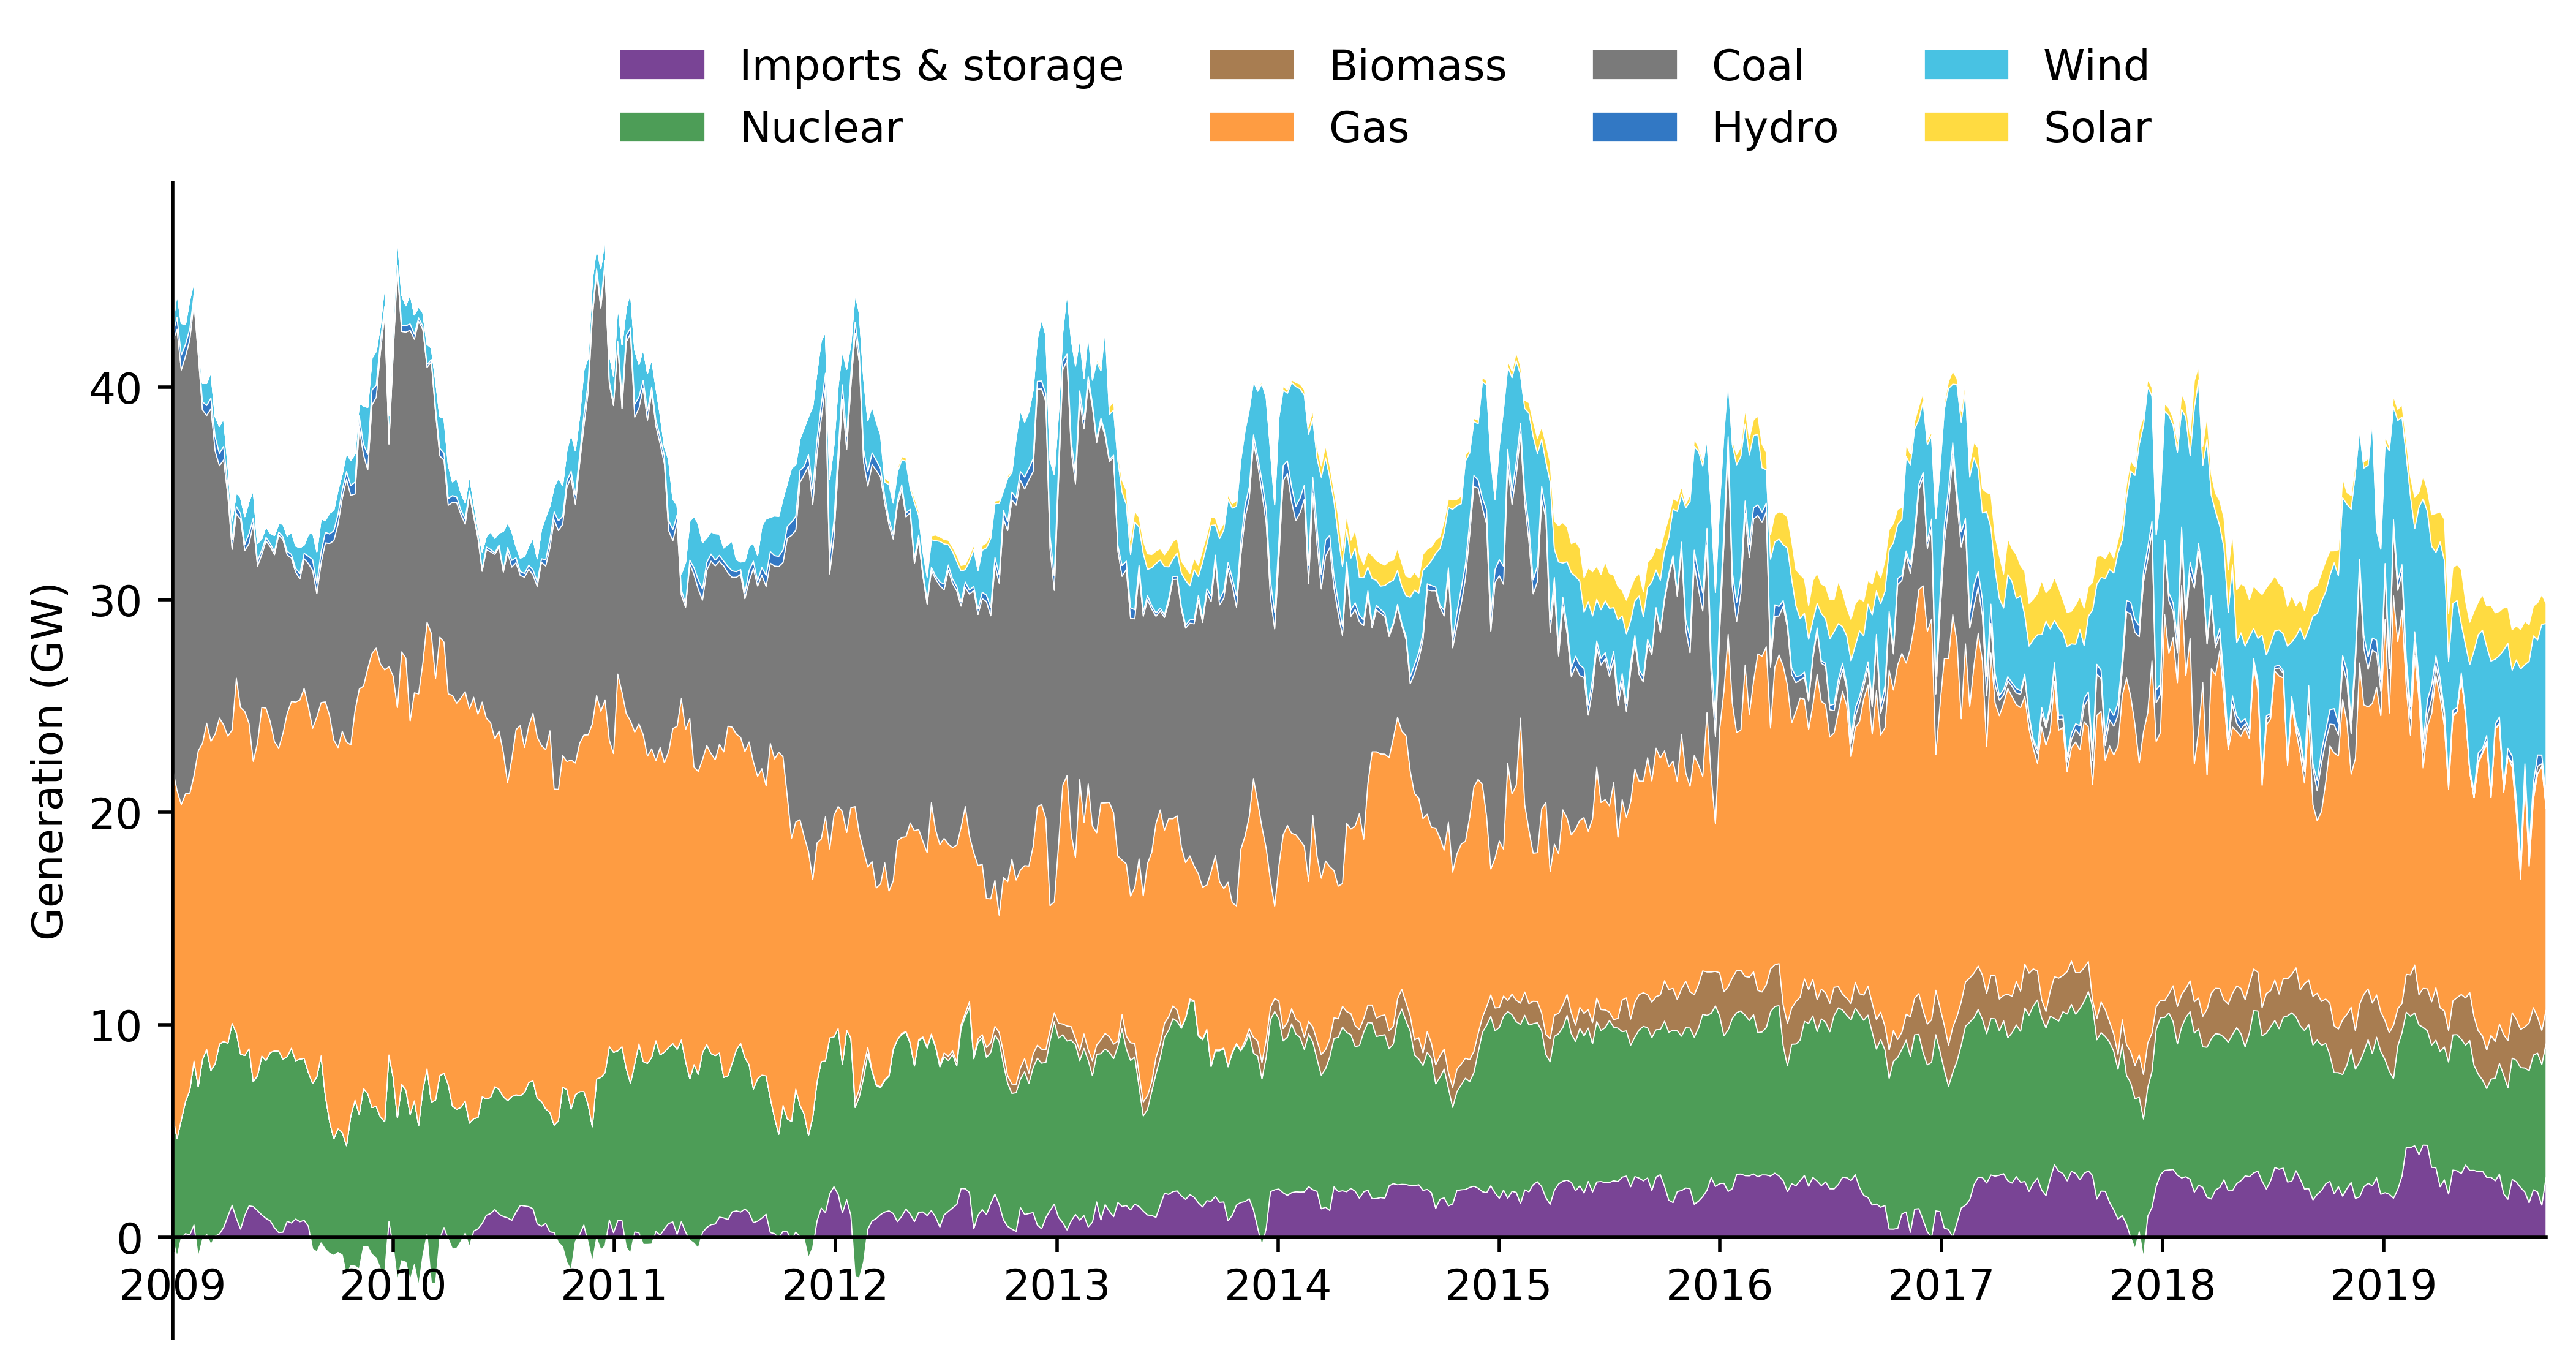

In [2]:
df_EI = pd.read_csv('data/EI.csv')
df_EI['local_datetime'] = pd.DatetimeIndex(pd.to_datetime(df_EI['local_datetime'], utc=True)).tz_convert('Europe/London')
df_EI = df_EI.set_index('local_datetime')
df_EI = df_EI.drop_duplicates()

df_EI_resampled = EI.clean_df(df_EI)
EI.quick_plot(df_EI_resampled, save_path='img/UK_fuel_transition_2019_Q3.png', dpi=500)

<br>

There's an issue that some data isn't at standard intervals but it's mostly for imbalance. Temperature also just has lots of unknown values

In [12]:
100*df_EI.isnull().sum()/df_EI.shape[0]

day_ahead_price     0.042293
SP                  0.000000
imbalance_price     0.019224
temperature         0.063715
gCO2_per_kWh        0.037350
TCO2_per_h          0.037350
biomass             0.028562
coal                0.028562
demand              0.028562
gas                 0.028562
hydro               0.028562
nuclear             0.028562
pumped_storage      0.028562
solar               0.028562
wind                0.028562
dutch               0.028562
french              0.028562
irish               0.028562
belgian             0.000000
ireland             0.009887
northern_ireland    0.009887
dtype: float64

In [9]:
df_EI.to_csv('data/EI.csv')